# 南山理賠服務及理賠再購資料探索

### 資料型態

In [120]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from collections import Counter
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

#function drawing Barplot
def barplot(x_data, y_data, x_label="", y_label="", title=""):
    font = font_manager.FontProperties(fname='msjh.ttc',weight='bold',style='normal', size=16)
    plt.figure(figsize = (15,8))
    ax = plt.subplot(1,1,1)
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    # to remove line between points
    ax.set_ylabel(y_label, fontproperties = font, fontsize = 20)
    ax.set_xlabel(x_label, fontproperties = font, fontsize = 20)
    ax.set_xticklabels(x_data,fontproperties = font, rotation = 90, fontsize = 15)
    ax.set_title(title)

# 讀取 CSV File
df = pd.read_csv('CLAIM.csv',encoding = 'big5')
df2 = df.fillna(0) #將Nah轉為0
df2.head()

,CASE_NO,INSURED_SEX,AGE_RANK,TENURE,ILLNESS_CD,illness_code_desc,HOSP_CD,hospital_name,REIMB_AMT_K,settle_dt,CountNo,REIMB_AMT_5Y_K,RECENCY_YEAR,CountCovNo,Sum_afyp_K,EFFECTdate,TYPE_CODE,AFYP_K
0,1,F,02.21~40,16,A47202,橈骨骨折,DM0068,澄清綜合醫院（中港分院）,7,2017/10/25,0.0,0.0,16,1.0,18.0,0,0,0.0
1,2,M,03.41~60,16,A27902,冠狀動脈疾病,UM0011,新光醫院,18,2017/3/3,3.0,71.0,16,2.0,23.0,0,0,0.0
2,3,M,02.21~40,24,A29101,腦中風,UM0009,長庚醫院(林口、台北、桃園),5,2017/9/15,0.0,0.0,24,3.0,44.0,0,0,0.0
3,4,M,02.21~40,28,A36000,"攝護腺（前列腺）疾病（發炎,肥大等）",UM0098,台安醫院,0,2017/3/8,5.0,32.0,28,3.0,27.0,0,0,0.0
4,5,M,02.21~40,28,A48003,腕及手之脫臼，扭，拉，挫，捩傷,UM0100,博仁醫院,2,2017/7/6,7.0,133.0,27,4.0,44.0,0,0,0.0


# 有再購跟沒再購人數

無再購: 103974
有再購: 3637


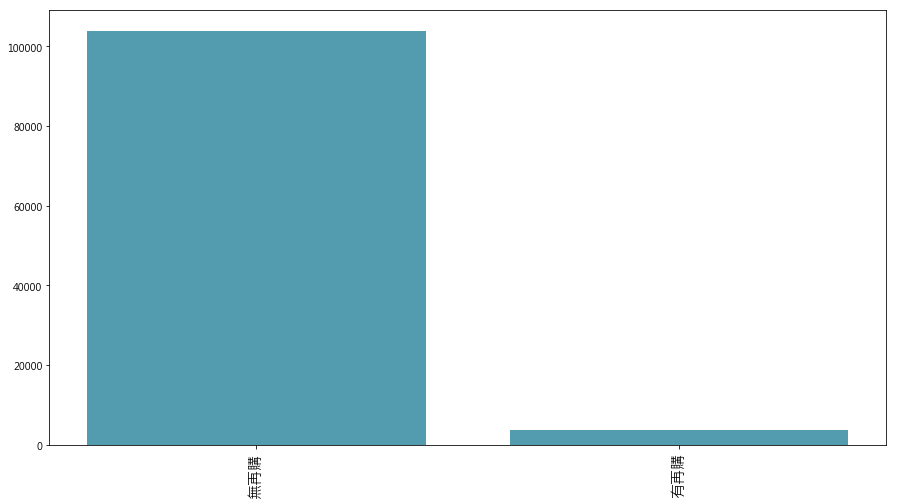

In [121]:
no_rebuy = df2[df2['EFFECTdate'] == 0] #無回購表單的人
rebuy = df2[df2['EFFECTdate'] != 0]
print('無再購'+':', len(no_rebuy))
print('有再購'+':', len(rebuy))
barplot(['無再購','有再購'],[len(no_rebuy),len(rebuy)])

# 觀察有/無再購的年齡層人數分布
> 由兩張長條圖可以發現兩種類型分布沒有顯著差距，而年齡層 21~40歲所佔人數皆為最高，可見這樣的年齡層為最主要的客戶。其他年齡層0~20次之，再來41~60，最後則是61+。其中以下繼續探討20~40歲年齡層所保的保單類型是否可以發現潛力商品。

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>


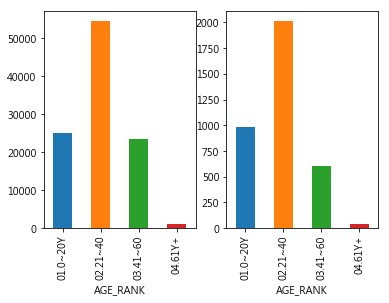

In [122]:
plt.subplot(1,2,1)
agegroup2 = no_rebuy.groupby("AGE_RANK")
data = agegroup2.size() #年齡分層每個組別內的大小
data.plot.bar()

plt.subplot(1,2,2)
agegroup = rebuy.groupby("AGE_RANK")
print(type(agegroup))
data2 =agegroup.size() #每個組別內的大小
data2.plot(kind = 'bar')
plt.show()
# barplot(dict(agegroup2.size()).keys(), dict(agegroup2.size()).values())


# 觀察各年齡層五年內總理賠金差異
* 即便人數最多，我們不能確定該年齡層是否為收入的主要來源，所以以下用長條圖和圓餅圖來呈現實際數字與比例上的差異。
* 下兩圖縱軸為五年內總理賠金(單位:千)，橫軸為各年齡層。左圖為沒有再購五年總理賠金，右圖為有再購五年總理賠金。
* 其中有趣的是0~20歲為其中第三多的，與上面圖表結合，可出略判斷其人數為第二多，金額卻沒有比較多，猜測為父母樂於幫小朋友投小金額保單。
* 如此一來可以確定年齡層21~40，為人數和理賠金總額都為最多，接下來繼續探討投哪些項目的保單。

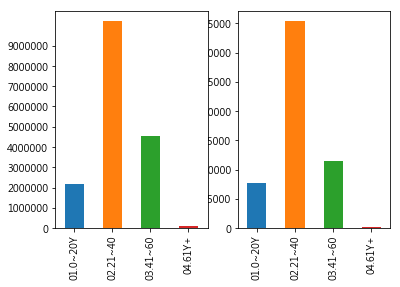

In [123]:
plt.subplot(1,2,2)
a = agegroup.get_group("01.0~20Y")["REIMB_AMT_5Y_K"].sum()
b = agegroup.get_group("02.21~40")["REIMB_AMT_5Y_K"].sum()
c = agegroup.get_group("03.41~60")["REIMB_AMT_5Y_K"].sum()
d = agegroup.get_group("04.61Y+")["REIMB_AMT_5Y_K"].sum()
y_data = pd.Series(data = np.array([a,b,c,d]), index = ["01.0~20Y","02.21~40","03.41~60","04.61Y+"])
y_data.plot(kind = 'bar')

#1e7為10^7
plt.subplot(1,2,1)
a2 = agegroup2.get_group("01.0~20Y")["REIMB_AMT_5Y_K"].sum()
b2 = agegroup2.get_group("02.21~40")["REIMB_AMT_5Y_K"].sum()
c2 = agegroup2.get_group("03.41~60")["REIMB_AMT_5Y_K"].sum()
d2 = agegroup2.get_group("04.61Y+")["REIMB_AMT_5Y_K"].sum()
y_data2 = pd.Series(data = np.array([a2,b2,c2,d2]), index = ["01.0~20Y","02.21~40","03.41~60","04.61Y+"])
y_data2.plot(kind = 'bar')
my_y_ticks = np.arange(0, 10**7, 1000000)
plt.yticks(my_y_ticks)

plt.show()
plt.close()

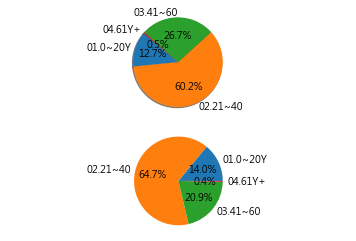

In [124]:
plt.subplot(2,1,1)
plt.pie([a2,b2,c2,d2], labels=["01.0~20Y","02.21~40","03.41~60","04.61Y+"], autopct='%1.1f%%',shadow=True, startangle=140)
plt.axis('equal')

plt.subplot(2,1,2)
plt.pie([a,b,c,d], labels=["01.0~20Y","02.21~40","03.41~60","04.61Y+"], autopct='%1.1f%%')
plt.axis('equal')

plt.show()
plt.close()

# 觀察 "排除21-40歲" 跟 "21-40歲" 的理賠項目
> 透過觀察最常出現的20個病因，兩個族群最常被理賠的項目都是比較日常的傷害如'脫臼，扭，拉，挫，捩傷'等等，後面幾項也多有雷同，表示這些項目不論年齡層都會時常發生。那下個問題來啦大家耳熟能詳的癌症等等重症保單跑去哪裡了?由於這些重症不常發生，所以出現次數越少，但是接下來透過五年內理賠次數作為Y軸依據的話，就會衝上來啦。接下來關注再21~40歲繼續深入探討!

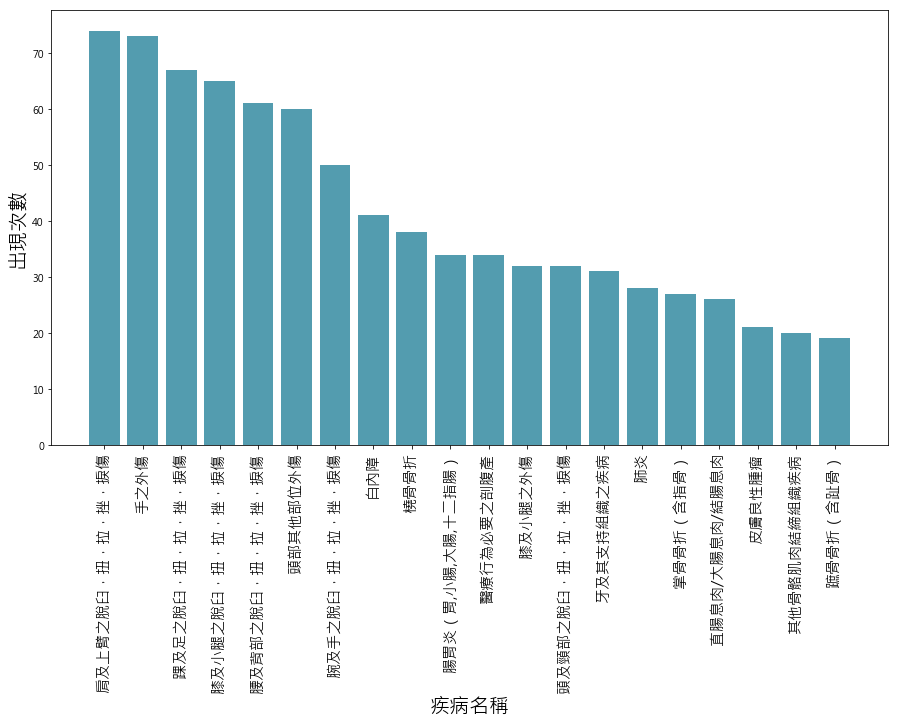

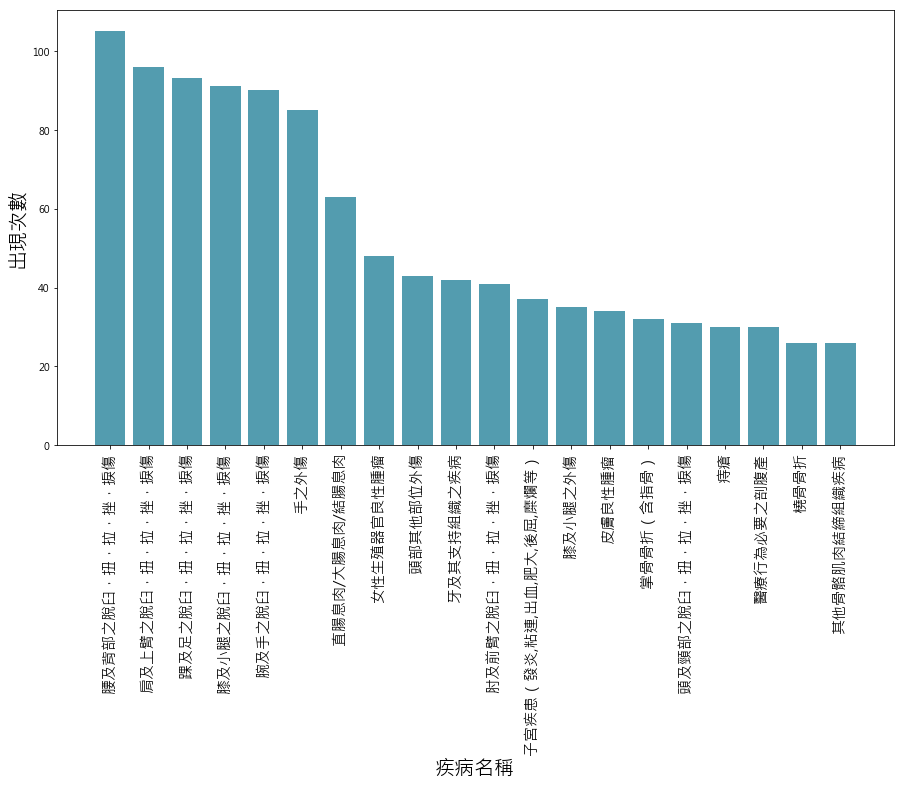

In [125]:
rebuyillness = rebuy.groupby("illness_code_desc")
GG = (agegroup.get_group("01.0~20Y").append(agegroup.get_group("03.41~60"))).append(agegroup.get_group("04.61Y+"))
rebuysort = GG.groupby("illness_code_desc").size().sort_values(ascending = False)
name = list(rebuysort.index)
value =rebuysort.tolist()
barplot(name[:20], value[:20], x_label ='疾病名稱', y_label = '出現次數')

G2040 = agegroup.get_group("02.21~40").groupby('illness_code_desc').size().sort_values(ascending = False)
name2 = list(G2040.index)
value2 = G2040.tolist()
barplot(name2[:20], value2[:20], x_label ='疾病名稱', y_label = '出現次數')

# 觀察21-40歲各保單病因五年內平均跟總額理賠金
* 首先平均保單每張金額前20名的可大致分為惡性腫瘤，癌症，器官，血管等。但是雖然金額高，卻不一定代表總額多，所以必須加入總張數的因素，探討總額。
* 算出來的總額前20名如下圖，與上個Section比較的話，可以發現乳房癌症越居榜首(數量大，也有單張金額大)。令人驚訝的是沒有在前20名以內的骨折類項等項目，雖然金額較小，卻因為時常理賠，讓總額在不小的數目。
* 透過21-40歲五年內理賠總額圖可以看出來平常大部分比例支出分為兩種。一，頻率小金額高的重症型。二，高頻率金額低的日常生活型。

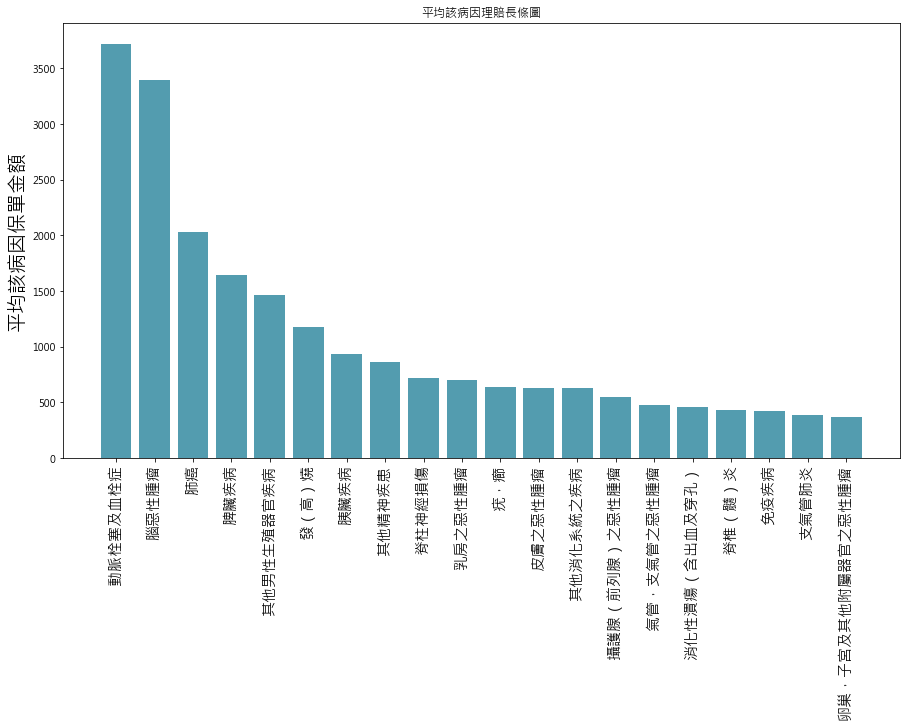

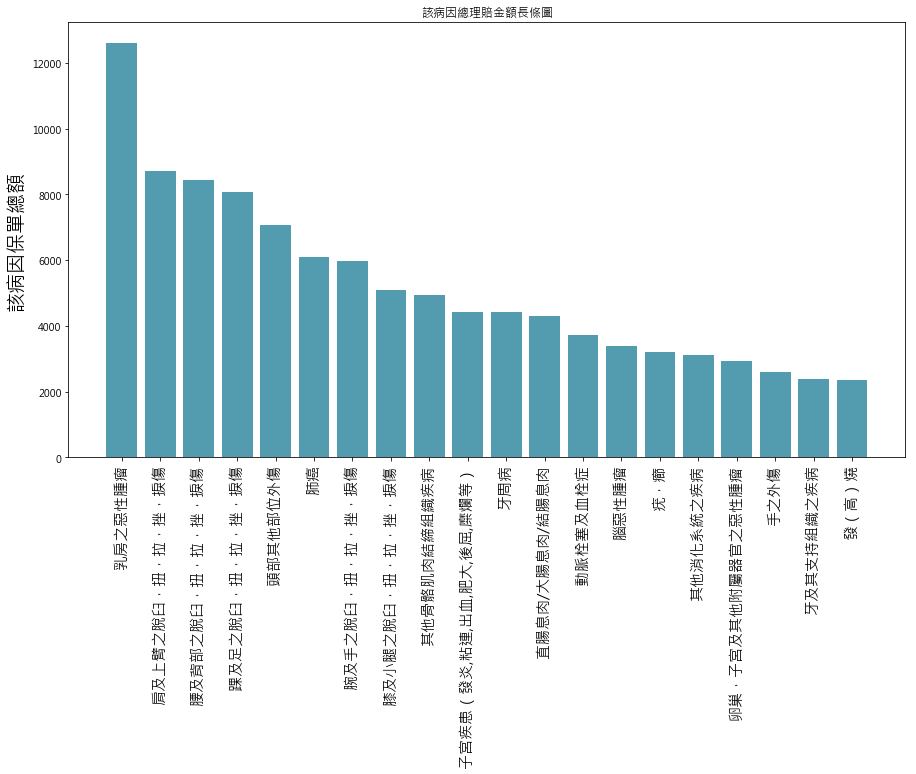

In [127]:
meanlistrebuy = []
sumlistrebuy = []
rebuyillness = agegroup.get_group("02.21~40").groupby('illness_code_desc')
for i in name2:
    a = rebuyillness.get_group(i)["REIMB_AMT_5Y_K"].mean()
    b = rebuyillness.get_group(i)["REIMB_AMT_5Y_K"].sum()
    meanlistrebuy.append(a)
    sumlistrebuy.append(b)
rebuywholedatamoney = sorted(list(zip(name2,sumlistrebuy)), key=lambda x: x[1],reverse = True)
rebuymeandatamoney = sorted(list(zip(name2,meanlistrebuy)), key=lambda x: x[1],reverse = True)
#barplot with list of tuples
d = dict(Counter(dict(rebuymeandatamoney)).most_common(20))
d2 = dict(Counter(dict(rebuywholedatamoney)).most_common(20))
barplot(d.keys(),d.values(), y_label = "平均該病因保單金額", title = "平均該病因理賠長條圖")
barplot(d2.keys(),d2.values(),y_label = "該病因保單總額", title = "該病因總理賠金額長條圖")

# 試算21-40歲每個病因的利潤
* 透過拿到的資料，設立試算利潤。算式: 已購買保單總年化保費(Sum_afyp_K,單位:千) - 五年內總理賠金額(REIMB_AMT_5Y_K,單位:千)/5 = 利潤，五年內直接除以5是不嚴謹的計算方式，但以手上拿到的資料，利用這樣的算式簡單觀測各病因利潤。

In [112]:
def show(val):
    color = 'red' if val < 0 else 'green'
    return 'color:%s' % color

topincome = agegroup.get_group("02.21~40").groupby('illness_code_desc')
topincomedf = topincome[['REIMB_AMT_5Y_K','AFYP_K','Sum_afyp_K']].sum()
topincomedf['Count'] = dict(topincome.size()).values()
topincomedf['RevenuePercent'] = topincomedf['Sum_afyp_K'].apply(lambda x: (x / topincomedf['Sum_afyp_K'].sum())*100)
topincomedf['RevenuePercent'] = topincomedf['REIMB_AMT_5Y_K'].apply(lambda x: (x / 5))
topincomedf['Income'] =  + topincomedf['Sum_afyp_K']  - topincomedf['REIMB_AMT_5Y_K'] #topincomedf['AFYP_K']
income = topincomedf['Income'].sum()
#topincomedf.sort_values(by=['RevenuePercent'], ascending = False)
topincomedf = topincomedf.sort_values(by=['Income'], ascending = False)
topincomedf.style.applymap(show, subset = pd.IndexSlice[:,'Income'])

,REIMB_AMT_5Y_K,AFYP_K,Sum_afyp_K,Count,RevenuePercent,Income
illness_code_desc,,,,,,
踝及足之脫臼，扭，拉，挫，捩傷,8059,5650,56543,93,1611.8,48484
直腸息肉/大腸息肉/結腸息肉,4309,8070,46269,63,861.8,41960
皮膚良性腫瘤,1460,4286,35632,34,292,34172
手之外傷,2601,7042,36032,85,520.2,33431
肩及上臂之脫臼，扭，拉，挫，捩傷,8707,8792,34439,96,1741.4,25732
頭部其他部位外傷,7079,5963,32443,43,1415.8,25364
"子宮疾患（發炎,粘連,出血,肥大,後屈,糜爛等）",4413,5014,28893,37,882.6,24480
支氣管肺炎,1155,100,22834,3,231,21679
腰及背部之脫臼，扭，拉，挫，捩傷,8435,10454,28560,105,1687,20125


# 小結
* 綠色為利潤為正，紅色為利潤為負。由結果呈現，利潤較高的多為日常型的(如'脫臼，扭，拉，挫，捩傷'、眼睛疾病、腰/背痛等等)也是一般人生活中會遇到的。利潤為負的多為重症型(如惡性腫瘤，癌症等等)，多數人不會遇到，卻是最需要保險幫助的病因。由此觀察出來南山人壽在於關懷罹癌和長照確實是不遺餘力，在於外溢保單客戶也是最近流行的買保單方式也有相當成功的獲利。
* 南山人壽可以朝現在的發展型態前進，持續推出兩種主流商品
 * 符合現在**趨勢**或是**必備**的**日常型商品**
 * 推廣雖利潤為負卻可以推廣**企業形象**的**重症型商品**。